c:\Users\billh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


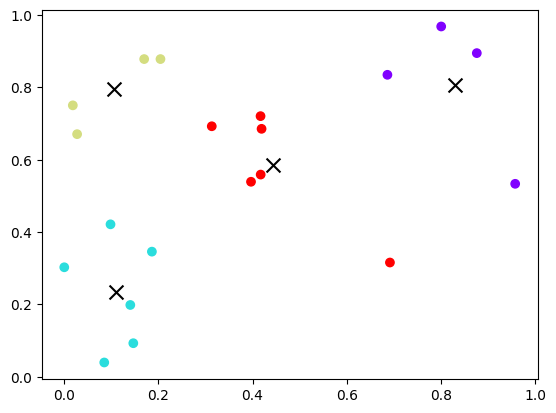

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generating random data
np.random.seed(1)
points = np.random.rand(20, 2)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(points)
labels = kmeans.labels_

# Plotting the points and centroids
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black')
plt.show()


In [4]:
points

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01],
       [3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01],
       [2.04452250e-01, 8.78117436e-01],
       [2.73875932e-02, 6.70467510e-01],
       [4.17304802e-01, 5.58689828e-01],
       [1.40386939e-01, 1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01],
       [3.13424178e-01, 6.92322616e-01],
       [8.76389152e-01, 8.94606664e-01],
       [8.50442114e-02, 3.90547832e-02],
       [1.69830420e-01, 8.78142503e-01],
       [9.83468338e-02, 4.21107625e-01],
       [9.57889530e-01, 5.33165285e-01],
       [6.91877114e-01, 3.15515631e-01],
       [6.86500928e-01, 8.34625672e-01],
       [1.82882773e-02, 7.50144315e-01]])

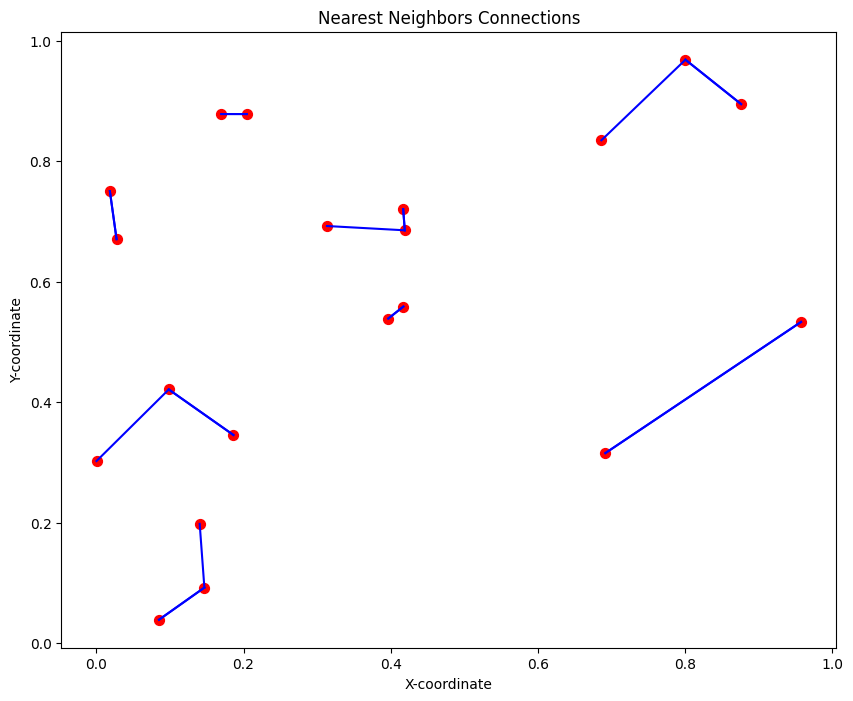

In [16]:
from sklearn.neighbors import NearestNeighbors

# Your provided data
data = points

# Find the two nearest neighbors for each point (including itself)
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(data)
distances, indices = nbrs.kneighbors(data)

# Plot the data and connections
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c='red', s=50)
for i, (distance, nearest) in enumerate(zip(distances, indices)):
    plt.plot([data[i][0], data[nearest[1]][0]], [data[i][1], data[nearest[1]][1]], 'b-')
plt.title("Nearest Neighbors Connections")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()


In [29]:
distances

array([[0.        , 0.03517215],
       [0.        , 0.15413348],
       [0.        , 0.08153218],
       [0.        , 0.11591417],
       [0.        , 0.02857834],
       [0.        , 0.03517215],
       [0.        , 0.03462184],
       [0.        , 0.08019471],
       [0.        , 0.02857834],
       [0.        , 0.10595449],
       [0.        , 0.10558006],
       [0.        , 0.10600858],
       [0.        , 0.10558006],
       [0.        , 0.08153218],
       [0.        , 0.03462184],
       [0.        , 0.11591417],
       [0.        , 0.34370624],
       [0.        , 0.34370624],
       [0.        , 0.17581287],
       [0.        , 0.08019471]])

In [8]:
threshold = 0.13

# Calculate pairwise distances
dist_matrix = squareform(pdist(data))

# Identify groups based on the threshold
groups = []
visited = set()

for i in range(len(data)):
    if i not in visited:
        # Points close to the current point
        close_points = np.where(dist_matrix[i] < threshold)[0]
        if len(close_points) > 1:
            groups.append(close_points)
            visited.update(close_points)

# Calculate centers of the groups
group_centers = [np.mean(data[group], axis=0) for group in groups]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c='red', s=50)
for group in groups:
    plt.plot(data[group][:, 0], data[group][:, 1], 'b-')
plt.scatter(np.array(group_centers)[:, 0], np.array(group_centers)[:, 1], c='green', s=100, marker='x')
plt.title("Grouped Points and Their Centers")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

NameError: name 'squareform' is not defined

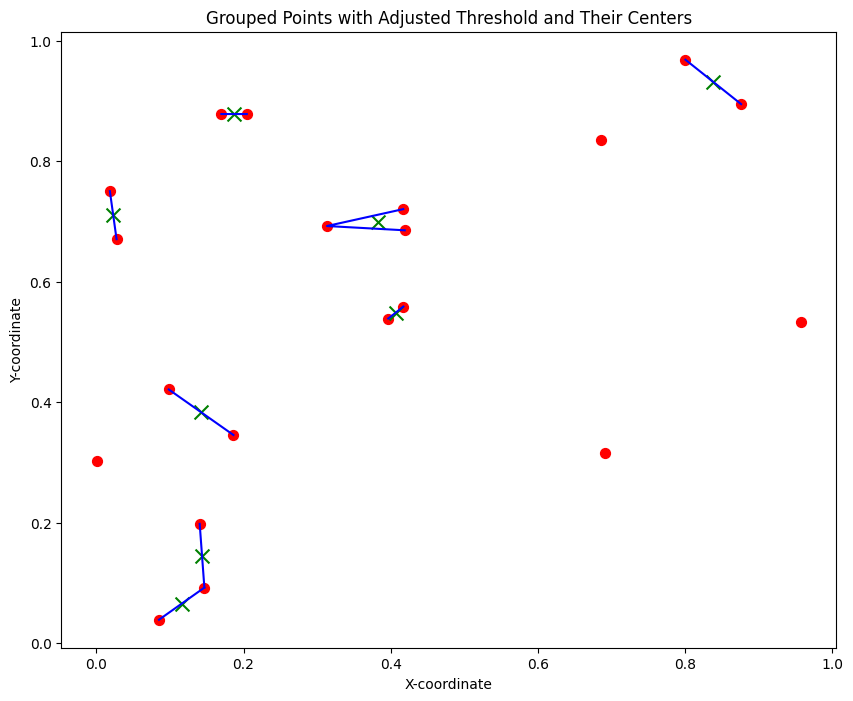

In [10]:
# Define the constant factor l
l = 0.05

# Identify groups based on the adjusted threshold
groups = []
visited = set()

for i in range(len(data)):
    if i not in visited:
        current_group = [i]
        potential_members = list(range(len(data)))
        while potential_members:
            j = potential_members.pop()
            if j not in current_group:
                # Adjust the threshold based on the size of the current group
                adjusted_threshold = threshold - l * (len(current_group) - 1)
                if np.any([np.linalg.norm(data[i] - data[j]) < adjusted_threshold for i in current_group]):
                    current_group.append(j)
                    visited.add(j)
        
        if len(current_group) > 1:
            groups.append(np.array(current_group))

# Calculate centers of the groups
group_centers = [np.mean(data[group], axis=0) for group in groups]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c='red', s=50)
for group in groups:
    plt.plot(data[group][:, 0], data[group][:, 1], 'b-')
plt.scatter(np.array(group_centers)[:, 0], np.array(group_centers)[:, 1], c='green', s=100, marker='x')
plt.title("Grouped Points with Adjusted Threshold and Their Centers")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()


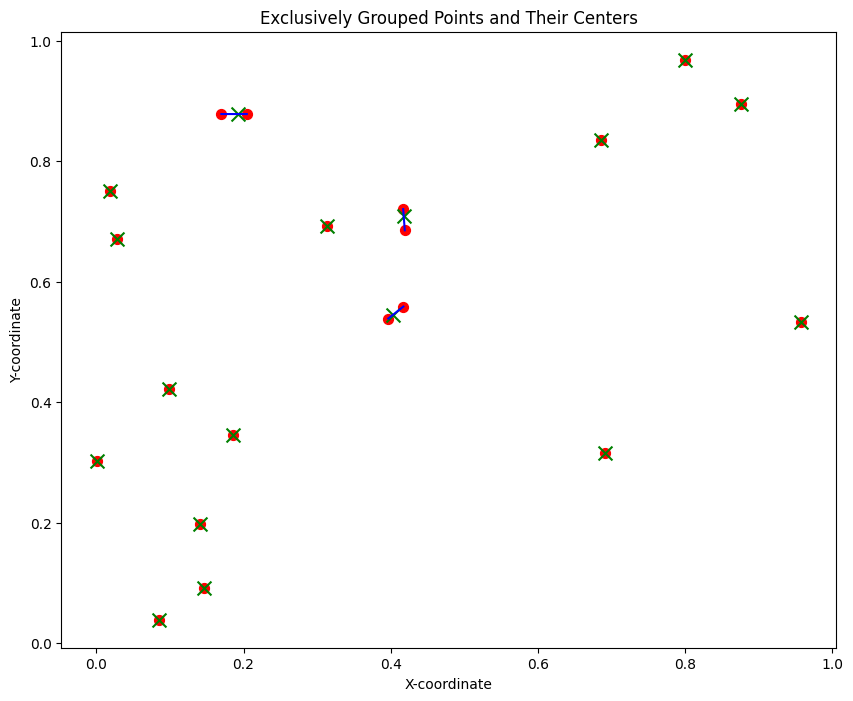

In [11]:
# Identify groups based on the dynamically adjusted threshold with exclusivity
groups = []
visited = set()

for i in range(len(data)):
    if i not in visited:
        current_group = [i]
        potential_members = list(range(len(data)))
        group_changed = True

        # Continually update the group until no more points can be added
        while group_changed:
            group_changed = False
            next_potential_members = []
            for j in potential_members:
                if j not in visited:
                    # Adjust the threshold based on the size of the current group
                    adjusted_threshold = threshold - l * (len(current_group) - 1)
                    if np.any([np.linalg.norm(data[i] - data[j]) < adjusted_threshold for i in current_group]):
                        current_group.append(j)
                        visited.add(j)
                        group_changed = True
                    else:
                        next_potential_members.append(j)
            potential_members = next_potential_members
        
        if len(current_group) > 1:
            groups.append(np.array(current_group))

# Calculate centers of the groups
group_centers = [np.mean(data[group], axis=0) for group in groups]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c='red', s=50)
for group in groups:
    plt.plot(data[group][:, 0], data[group][:, 1], 'b-')
plt.scatter(np.array(group_centers)[:, 0], np.array(group_centers)[:, 1], c='green', s=100, marker='x')
plt.title("Exclusively Grouped Points and Their Centers")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()


In [34]:
groups

[array([0, 5]),
 array([2, 9]),
 array([ 3, 15]),
 array([4, 8]),
 array([ 6, 14]),
 array([ 7, 19]),
 array([10, 12]),
 array([11,  0]),
 array([13,  2])]

In [5]:
from datasketch import MinHash, MinHashLSH
import numpy as np

# Convert 2D points to a string representation
def point_to_string(p):
    return f"{p[0]}_{p[1]}"

# Create MinHash for a point
def create_minhash(point):
    m = MinHash(num_perm=128)
    m.update(point_to_string(point).encode('utf8'))
    return m

# Generate some 2D data
np.random.seed(0)
points = np.random.rand(100, 2)

# Create an LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=128)

# Insert points into the LSH index
for idx, point in enumerate(points):
    lsh.insert(idx, create_minhash(point))

# For demonstration, query the LSH index for similar points
similar_points = {}
for idx, point in enumerate(points):
    result = lsh.query(create_minhash(point))
    similar_points[idx] = result

print(similar_points)


{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98], 99: [99]}


c:\Users\billh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


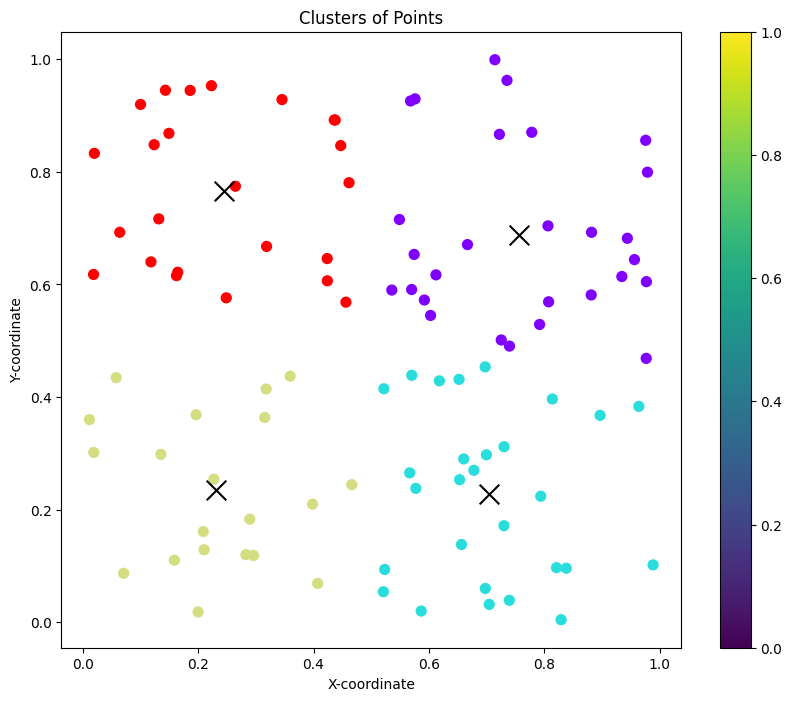

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some sample 2D data
np.random.seed(0)
points = np.random.rand(100, 2)

# Apply KMeans clustering to group points into clusters
# For the purpose of this demonstration, we'll assume 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(points)
labels = kmeans.labels_

# Plotting the points colored by their cluster label
plt.figure(figsize=(10, 8))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black')
plt.title("Clusters of Points")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.colorbar()
plt.show()


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generating random data
np.random.seed(1)
points = np.random.rand(6, 2)
data = points*10
threshold =3
l = 0.5
b =0.2 

In [46]:
data

array([[4.17022005e+00, 7.20324493e+00],
       [1.14374817e-03, 3.02332573e+00],
       [1.46755891e+00, 9.23385948e-01],
       [1.86260211e+00, 3.45560727e+00],
       [3.96767474e+00, 5.38816734e+00],
       [4.19194514e+00, 6.85219500e+00]])

In [47]:
group

[1, 2, 3]

[0]
[0]
[0]
[0]
[4, 4]
0.0
[1]
[2, 2]
0.0
[2, 2, 2]
0.0
[2, 2, 2]
0.0
[2, 2, 2]
0.0
[2, 2, 2]
0.0
[2, 2, 2]
0.0
[2, 2, 2]
0.0
[2, 2, 2]
0.0
[4, 4, 4]
0.0


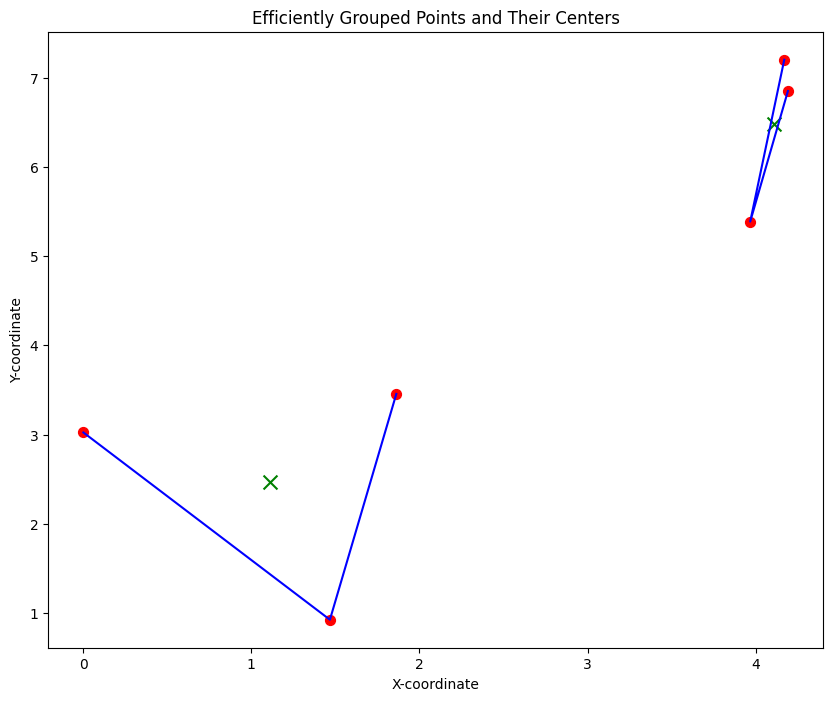

In [48]:
import numpy as np
import matplotlib.pyplot as plt

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            else:
                self.parent[rootX] = rootY
                if self.rank[rootX] == self.rank[rootY]:
                    self.rank[rootY] += 1

def average_distance(group, data):
    print(group)
    n = len(group)
    # print(group)
    if n == 1:  # if there's only one point in the group
        return 0
    total_distance = sum(np.linalg.norm(data[group[i]] - data[group[j]]) for i in range(n) for j in range(n) if i != j)
    # print(total_distance)
    return total_distance / (n * (n - 1))

# Initialize the DSU
dsu = UnionFind(len(data))

# Group points if their distance is below the threshold
for i in range(len(data)):
    for j in range(i+1, len(data)):
        group_members = [dsu.find(k) for k in range(len(data)) if dsu.find(k) == dsu.find(i)]
        adjusted_threshold = threshold - l * (len(group_members) - 1) - b * average_distance(group_members, data)
        
        if np.linalg.norm(data[i] - data[j]) < adjusted_threshold:
            dsu.union(i, j)

# Extract the groups
groups = {}
for i in range(len(data)):
    root = dsu.find(i)
    if root not in groups:
        groups[root] = []
    groups[root].append(i)

# Convert groups dictionary to list for consistency with previous approach
grouped_points = list(groups.values())

# Calculate centers of the groups
group_centers = [np.mean(data[group], axis=0) for group in grouped_points]

# Plotting
plt.figure(figsize=(10, 8))

plt.scatter(data[:, 0], data[:, 1], c='red', s=50)
# plt.scatter(data[:, 0], data[:, 1], c='red', s=50)
for group in grouped_points:
    plt.plot(data[group][:, 0], data[group][:, 1], 'b-')
plt.scatter(np.array(group_centers)[:, 0], np.array(group_centers)[:, 1], c='green', s=100, marker='x')
plt.title("Efficiently Grouped Points and Their Centers")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()
